<a href="https://colab.research.google.com/github/lyeslehara1996/Matser_SI_DL/blob/main/Models_tester_PFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
from tensorflow.keras.optimizers import Adam,Adamax,Adagrad,SGD,RMSprop
import keras.metrics as metrics
from keras import backend as K
from keras.layers import Bidirectional, Dense, Embedding, Input, Lambda, LSTM,GRU, RepeatVector, TimeDistributed, Layer, Activation, Dropout
from keras.models import Model
import tensorflow as tf
import pandas as pd
import numpy as np
import os

from keras import backend as K
from keras import regularizers,constraints
from keras import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

from keras import initializers as initializers

from keras.callbacks import ModelCheckpoint
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from tensorflow import  keras
import pandas as pd 
import re 
import nltk


import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
from numpy import zeros
from keras.layers import Dropout

from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import TweetTokenizer
import string as st
SAVEd = False


from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
from keras.utils.np_utils import to_categorical
nltk.download('stopwords')
nltk.download('punkt')
""" Dataset"""

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:

df=pd.read_excel("/content/drive/MyDrive/dossier_de_travail/SemEval2017A.xlsx")

df.drop("Unnamed: 3", axis=1, inplace=True)
df.drop("Unnamed: 4", axis=1, inplace=True)
df.drop("Unnamed: 5", axis=1, inplace=True)
df.drop("Unnamed: 6", axis=1, inplace=True)

df.head()


,ID,Polarity,Comments
0,619950566786113024,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T..."
1,619969366986235008,neutral,Order Go Set a Watchman in store or through ou...
2,619971047195044992,negative,If these runway renovations at the airport pre...
3,619974445185302016,neutral,If you could ask an onstage interview question...
4,619987808317406976,positive,A portion of book sales from our Harper Lee/Go...


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20632 entries, 0 to 20632
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        20632 non-null  object
 1   Polarity  20632 non-null  object
 2   Comments  20632 non-null  object
dtypes: object(3)
memory usage: 644.8+ KB


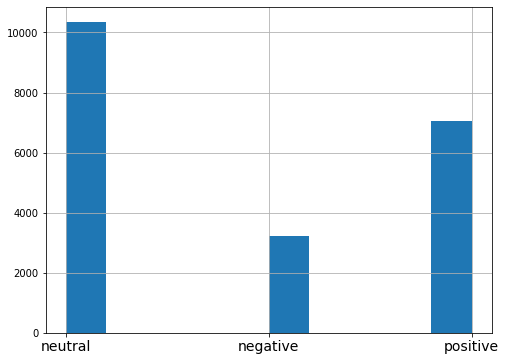

In [7]:

#supprimer les lignes qui contient des valeur null 
df.Polarity.unique()
df.dropna(subset=['Polarity'], inplace=True)
df.Polarity.unique()
df.info()


plt.figure(figsize=(8,6))
df.Polarity.hist(xlabelsize=14)
plt.show()



In [8]:
#### transformet les mots en miniscule ######
df.Comments=df.Comments.str.lower()
df.head()

,ID,Polarity,Comments
0,619950566786113024,neutral,"picturehouse's, pink floyd's, 'roger waters: t..."
1,619969366986235008,neutral,order go set a watchman in store or through ou...
2,619971047195044992,negative,if these runway renovations at the airport pre...
3,619974445185302016,neutral,if you could ask an onstage interview question...
4,619987808317406976,positive,a portion of book sales from our harper lee/go...


In [9]:

###################STOP WORDS################
#STOP WORDS
#Tokenization of text

tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['Comments']=df['Comments'].apply(remove_stopwords)

In [10]:

############supprission des caractere spiciaux Dans Commantaire #########
df['Comments'] = df['Comments'].apply(lambda x: re.sub(r'https?:\/\/\S+', ' ', str(x)))
df['Comments'] = df['Comments'].apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", ' ', str(x)))
df['Comments'] = df['Comments'].apply(lambda x: re.sub(r'{link}', ' ', str(x)))
df['Comments'] = df['Comments'].apply(lambda x: re.sub(r'&[a-z]+;', ' ', str(x)))
df['Comments'] = df['Comments'].apply(lambda x: re.sub(r"[^a-z]", ' ', str(x)))
df['Comments'] = df['Comments'].apply(lambda x: re.sub(r'@mention', ' ', str(x)))
df['Comments'] = df['Comments'].apply(lambda x: " ".join(x.lower() for x in str(x).split()  if len(x)>3 ))

In [12]:
#######deviser en review and labels ######


reviews =  df[['Comments']]
labels =  df[['Polarity']]

corpus= []
for text in reviews['Comments']:
    words= [word.lower() for word in word_tokenize(text)]
    corpus.append(words)

num_words=len(corpus)


In [13]:
####reviews sans ponctuation #######

revue_sans_ponctuation=[]
for sentence in reviews['Comments']:

    revue_sans_ponctuation.append(' '.join(Word.strip(st.punctuation) for Word in sentence.split()))

reviews_cleaned = np.asarray(revue_sans_ponctuation)
reviews_cleaned



review_array = np.asarray(revue_sans_ponctuation)
label_array = np.asarray(labels['Polarity'])

reviews_labels = np.stack((review_array, label_array), axis = 1)

reviews_labels

array([['picturehouse pink floyd roger waters walll opening sept making waves watch trailer rolling stone look',
        'neutral'],
       ['order watchman store website tuesday half price gsaw gsawatchmanbook',
        'neutral'],
       ['runway renovations airport prevent seeing taylor swift monday blood meaning',
        'negative'],
       ...,
       ['hours arrived saudi arabia tuesday turkish president recep tayyip erdogan accused syria president mercilessly',
        'neutral'],
       ['vanityfair alex kardashian worth love kardashian conure',
        'negative'],
       ['guess even pandora knows justin bieber grown condom played',
        'neutral']], dtype=object)

In [14]:
########Encoder les polarity  ##############
encoder = LabelEncoder()
encoder.fit(label_array)
encoded_labels = encoder.transform(label_array)
encoded_labels = to_categorical(encoded_labels)
encoded_labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [15]:
##### Train and Test
review_train, review_test, label_train, label_test = train_test_split(reviews_cleaned, encoded_labels, test_size=0.20, random_state=42)
print(review_train.shape, label_train.shape)
print(review_test.shape, label_test.shape)

tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(review_train)

review_train = tokenizer.texts_to_sequences(review_train)
review_test = tokenizer.texts_to_sequences(review_test)

vocab_size = len(tokenizer.word_index) + 1

(16505,) (16505, 3)
(4127,) (4127, 3)


In [16]:
embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/dossier_de_travail/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
    
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
print(embedding_matrix[1].shape)

(100,)


In [17]:
X_train=review_train  
X_test=review_test
y_train=label_train   
y_test=label_test
MAX_LENGTH = 100
NUM_WORDS = vocab_size
X_train = pad_sequences(X_train, padding='post', maxlen=MAX_LENGTH)
X_test = pad_sequences(X_test, padding='post', maxlen=MAX_LENGTH)

train_index = np.random.choice(np.arange(X_train.shape[0]), 400, replace=False)     
test_index = np.random.choice(np.arange(X_test.shape[0]), 250, replace=False)      

X_train = X_train[train_index]
y_train = y_train[train_index]

X_test = X_test[test_index]
y_test = y_test[test_index]
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)


X_train (400, 100)
y_train (400, 3)
X_test (250, 100)
y_test (250, 3)


In [111]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
	
	
  #metrics=['acc',f1_m,precision_m, recall_m]

# Model_1

In [101]:
MODEL_FILE_PATH = '/content/drive/MyDrive/ModelTest2'
MODEL_FILE_NAME = 'Model1.h5'
Model_1 = Sequential()
Model_1.add(Embedding(vocab_size,100,weights=[embedding_matrix], input_length=100, trainable=False,name='word_embedding'))

Model_1.add( LSTM(500, dropout=0.25,return_sequences=True))
Model_1.add(Dropout(0.25))

Model_1.add(LSTM(250, dropout=0.25,return_sequences=True))
Model_1.add(Dropout(0.25))

Model_1.add( LSTM(50, dropout=0.25,return_sequences=False))

Model_1.add(Dense(3,activation='softmax'))

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

save_best = ModelCheckpoint(os.path.join(MODEL_FILE_PATH,MODEL_FILE_NAME), 
                     monitor='val_accuracy', 
                     mode='max', 
                     verbose=1, 
                     save_best_only=True) 

Model_1.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy',f1_m,precision_m, recall_m])

Model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 word_embedding (Embedding)  (None, 100, 100)          2281400   
                                                                 
 lstm_53 (LSTM)              (None, 100, 500)          1202000   
                                                                 
 dropout_61 (Dropout)        (None, 100, 500)          0         
                                                                 
 lstm_54 (LSTM)              (None, 100, 250)          751000    
                                                                 
 dropout_62 (Dropout)        (None, 100, 250)          0         
                                                                 
 lstm_55 (LSTM)              (None, 50)                60200     
                                                                 
 dense_182 (Dense)           (None, 3)                

In [ ]:
history=Model_1.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(X_test,y_test),callbacks=[early_stopping, save_best])


Epoch 1/100
4/4 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.4350 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 00001: val_accuracy improved from -inf to 0.48800, saving model to /content/drive/MyDrive/ModelTest2/Model1.h5
4/4 [==============================] - 23s 4s/step - loss: 0.6925 - accuracy: 0.4350 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6907 - val_accuracy: 0.4880 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/100
4/4 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.4575 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 00002: val_accuracy did not improve from 0.48800
4/4 [==============================] - 16s 4s/step - loss: 0.6900 - accuracy: 0.4575 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6871 - val_accuracy: 0.4880 - val_f1_m: 0.0000e+00 - val_precisi

In [25]:
Model_1.evaluate(X_test,y_test,verbose=1)

8/8 [==============================] - 4s 473ms/step - loss: 0.5956 - accuracy: 0.4840 - f1_m: 0.3101 - precision_m: 0.4795 - recall_m: 0.2320


[0.5956372022628784,
 0.48399999737739563,
 0.3101371228694916,
 0.47952333092689514,
 0.2319711595773697]

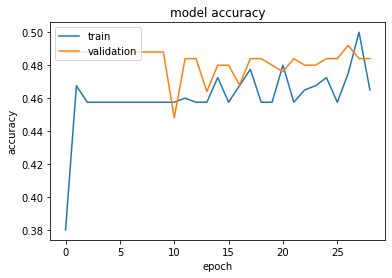

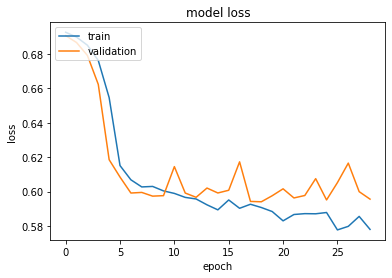

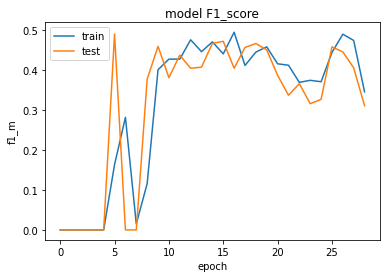

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Plot of loss in each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])

plt.title('model F1_score')
plt.ylabel('f1_m')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


# Model_2

In [33]:
MODEL_FILE_PATH = '/content/drive/MyDrive/ModelTest2'
MODEL_FILE_NAME = 'Mode_2.h5'
Model_2 = Sequential()
Model_2.add(Embedding(vocab_size,100,weights=[embedding_matrix], input_length=100, trainable=False,name='word_embedding'))

Model_2.add( Bidirectional( LSTM(500, dropout=0.25,return_sequences=True)))
Model_2.add(Dropout(0.25))

Model_2.add(Bidirectional(LSTM(250, dropout=0.25,return_sequences=True)))
Model_2.add(Dropout(0.25))

Model_2.add(Bidirectional( LSTM(50, dropout=0.25,return_sequences=False)))

Model_2.add(Dense(3,activation='softmax'))

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

save_best = ModelCheckpoint(os.path.join(MODEL_FILE_PATH,MODEL_FILE_NAME), 
                     monitor='val_accuracy', 
                     mode='max', 
                     verbose=1, 
                     save_best_only=True) 

Model_2.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy',f1_m,precision_m, recall_m])

Model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 word_embedding (Embedding)  (None, 100, 100)          2281400   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 1000)        2404000   
 l)                                                              
                                                                 
 dropout_8 (Dropout)         (None, 100, 1000)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 500)         2502000   
 nal)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 100, 500)          0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 100)             

In [34]:
history=Model_2.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(X_test,y_test),callbacks=[early_stopping, save_best])


Epoch 1/100
4/4 [==============================] - 56s 11s/step - loss: 0.6885 - accuracy: 0.3100 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6558 - val_accuracy: 0.4520 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 41s 10s/step - loss: 0.6498 - accuracy: 0.4825 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6278 - val_accuracy: 0.4840 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 41s 10s/step - loss: 0.6267 - accuracy: 0.4625 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6106 - val_accuracy: 0.4840 - val_f1_m: 0.0238 - val_precision_m: 0.7500 - val_recall_m: 0.0121
Epoch 4/100
4/4 [==============================] - 40s 10s/step - loss: 0.6110 - accuracy: 0.4650 - f1_m: 0.0510 - precision_m: 0.4708 - recall_m: 0

In [35]:
Model_2.evaluate(X_test,y_test,verbose=1)

8/8 [==============================] - 9s 1s/step - loss: 0.6026 - accuracy: 0.5280 - f1_m: 0.5051 - precision_m: 0.5334 - recall_m: 0.4805


[0.602588951587677,
 0.527999997138977,
 0.505092442035675,
 0.5334460735321045,
 0.48046875]

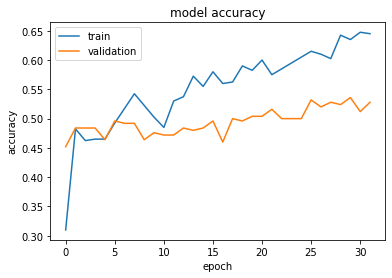

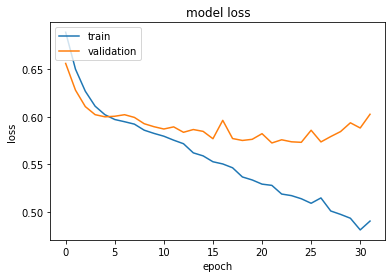

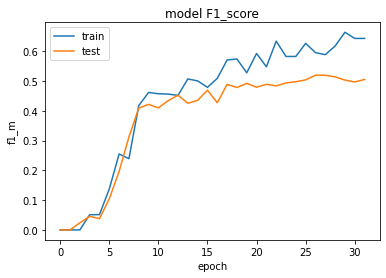

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Plot of loss in each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])

plt.title('model F1_score')
plt.ylabel('f1_m')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


# Model Transformer avec Multi_head_self_Attention

**Code de l'attention :**

In [89]:

LR = 0.0001 # Default for Adam is 0.001
N_BATCH = 128
N_EPOCHS = 20
N_HEADS = 8
DIM_HIDDEN = 300 # Dimensionality of the hidden state h_t outputted by the LSTM
# Dimensionality of the weight matrices used while computing the attention, note that we divide this into n_head parts later
DIM_KEY = N_HEADS*64


# A more general and complete version of the layer defined in the linked keras example

class MultiHeadSelfAttention(Layer):
    """ This uses Bahadanau attention """
    
    def __init__(self, num_heads = 8, weights_dim = 64):
        """ Constructor: Initializes parameters of the Attention layer """
        
        # Initialize base class:
        super(MultiHeadSelfAttention, self).__init__()
        
        # Initialize parameters of the layer:
        self.num_heads = num_heads
        self.weights_dim = weights_dim
        
        if self.weights_dim % self.num_heads != 0:
            raise ValueError(f"Weights dimension = {weights_dim} should be divisible by number of heads = {num_heads} to ensure proper division into sub-matrices")
            
        # We use this to divide the Q,K,V matrices into num_heads submatrices, to compute multi-headed attention
        self.sub_matrix_dim = self.weights_dim // self.num_heads 
        
       
        
        # Weight matrices for computing query, key and value (Note that we haven't defined an activation function anywhere)
        # Important: In keras units contain the shape of the output
        self.W_q = Dense(units = weights_dim) 
        self.W_k = Dense(units = weights_dim)
        self.W_v = Dense(units = weights_dim)
        
        
    def get_config(self):
        """ Required for saving/loading the model """
        config = super().get_config().copy()
        config.update({
            "num_heads" : self.num_heads,
            "weights_dim" : self.weights_dim
            # All args of __init__() must be included here
        })
        return config
    
    
    def build(self, input_shape):
        """ Initializes various weights dynamically based on input_shape """
        input_dim = input_shape[-1]
        self.input_dim = input_dim
        # Weight matrix for combining the output from multiple heads:
        # Takes in input of shape (batch_size, seq_len, weights_dim) returns output of shape (batch_size, seq_len, input_dim)
        self.W_h = Dense(units = input_dim)

        
    def attention(self, query, key, value):
        """ The main logic """
        # Compute the raw score = QK^T 
        score = tf.matmul(query, key, transpose_b=True)
        
        # Scale by dimension of K
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32) # == DIM_KEY
        scaled_score = score / tf.math.sqrt(dim_key)
        
        # Weights are the softmax of scaled scores
        weights = tf.nn.softmax(scaled_score, axis=-1)
        
        # The final output of the attention layer (weighted sum of hidden states)
        output = tf.matmul(weights, value)
        
        return output, weights

    
    def separate_heads(self, x, batch_size):
        """ 
            Splits the given x into num_heads submatrices and returns the result as a concatenation of these sub-matrices
        """
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.sub_matrix_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    
    def call(self, inputs):
        """ All computations take place here """
        
        batch_size = tf.shape(inputs)[0]
        
        # Compute Q = W_q*X
        query = self.W_q(inputs)  # (batch_size, seq_len, weights_dim)
        
        # Compute K = W_k*X
        key = self.W_k(inputs)  # (batch_size, seq_len, weights_dim)
        
        # Compute V = W_v*X
        value = self.W_v(inputs)  # (batch_size, seq_len, weights_dim)
        
        # Split into n_heads submatrices
        query = self.separate_heads(query, batch_size)  # (batch_size, num_heads, seq_len, sub_matrix_dim)
        key = self.separate_heads(key, batch_size)  # (batch_size, num_heads, seq_len, sub_matrix_dim)
        value = self.separate_heads(value, batch_size) # (batch_size, num_heads, seq_len, sub_matrix_dim)
        
        # Compute attention (contains weights and attentions for all heads):
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len, num_heads, sub_matrix_dim)
        
        # Concatenate all attentions from different heads (squeeze the last dimension):
        concat_attention = tf.reshape(attention, (batch_size, -1, self.weights_dim))  # (batch_size, seq_len, weights_dim)
        
        # Use a weighted average of the attentions from different heads:
        output = self.W_h(concat_attention)  # (batch_size, seq_len, input_dim)
        
        return output
    
    
    def compute_output_shape(self, input_shape):
        print(input_shape)
        """ Specifies the output shape of the custom layer, without this, the model doesn't work """
        return input_shape


In [141]:

def buildModel1():
    
    # The input as sequences:
    input_layer = Input(shape=(MAX_LENGTH,))
    # Create the embedding layer
    embedding_layer = Embedding(
        vocab_size,
        100,
        weights = [embedding_matrix],
        input_length = MAX_LENGTH,
        trainable = False # No need to train as our embeddings are already finetuned on Twitter data
    )
    # Create the embeddings
    embedded_sequences = embedding_layer(input_layer)

    # Single layer BiLSTM architecture
    word_gru3 = Bidirectional(
        LSTM(
            units = 300,  
            dropout = 0.3,
            return_sequences = True,
        ),
        merge_mode = "concat" # Just like in Transformers, thus output h = [h_f; h_b] will have dimension 2*DIM_HIDDEN
    )(embedded_sequences) 


    
    # Adding multiheaded self attention
    x = MultiHeadSelfAttention(N_HEADS, DIM_KEY)(word_gru3)
    
    outputs = Flatten()(x)
    
    model = Model(input_layer, outputs)
    return model

def buildModel2():
    input_layer = Input(shape = (2*MAX_LENGTH*DIM_HIDDEN,))
    # Fully connected classifer
    x = Dense(1024, activation = "relu")(input_layer)
    x = Dropout(0.2)(x)
    x = Dense(256, activation = "relu")(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation = "relu")(x)
    outputs = Dense(3, activation = "softmax")(x)
    model = Model(input_layer, outputs)
    return model

def combineModels():
    model1 = buildModel1()
    model2 = buildModel2()
    
    input1 = Input(shape=(MAX_LENGTH,))
    out1 = model1(input1)
    out2 = model2(out1)
    
    model = Model(input1, out2)
    return model

#model = buildModel()
model = combineModels()
model.compile(
    optimizer ='adam', 
    loss = "binary_crossentropy", # As binary classification
    metrics = ['accuracy'] # Balanced classes, thus good enough metric
)



print(model.summary())



Model: "model_121"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_129 (InputLayer)      [(None, 100)]             0         
                                                                 
 model_119 (Functional)      (None, None)              4474736   
                                                                 
 model_120 (Functional)      (None, 3)                 61711747  
                                                                 
Total params: 66,186,483
Trainable params: 63,905,083
Non-trainable params: 2,281,400
_________________________________________________________________
None


In [142]:
history=model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(X_test,y_test),callbacks=[early_stopping, save_best])


Epoch 1/100
4/4 [==============================] - ETA: 0s - loss: 0.8561 - accuracy: 0.3375
Epoch 00001: val_accuracy improved from 0.35600 to 0.48400, saving model to /content/drive/MyDrive/ModelTest2/Model_3.h5
4/4 [==============================] - 151s 7s/step - loss: 0.8561 - accuracy: 0.3375 - val_loss: 0.6347 - val_accuracy: 0.4840
Epoch 2/100
4/4 [==============================] - ETA: 0s - loss: 0.6292 - accuracy: 0.4650
Epoch 00002: val_accuracy improved from 0.48400 to 0.48800, saving model to /content/drive/MyDrive/ModelTest2/Model_3.h5
4/4 [==============================] - 30s 8s/step - loss: 0.6292 - accuracy: 0.4650 - val_loss: 0.6163 - val_accuracy: 0.4880
Epoch 3/100
4/4 [==============================] - ETA: 0s - loss: 0.5946 - accuracy: 0.4850
Epoch 00003: val_accuracy did not improve from 0.48800
4/4 [==============================] - 24s 6s/step - loss: 0.5946 - accuracy: 0.4850 - val_loss: 0.6060 - val_accuracy: 0.4200
Epoch 4/100
4/4 [=========================

In [145]:
model.evaluate(X_test,y_test,verbose=1)

8/8 [==============================] - 4s 499ms/step - loss: 0.7573 - accuracy: 0.5120


[0.7573044300079346, 0.5120000243186951]

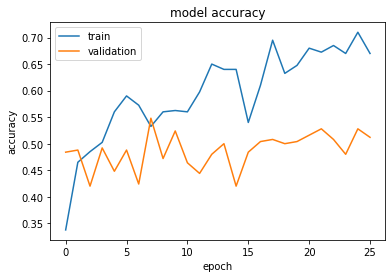

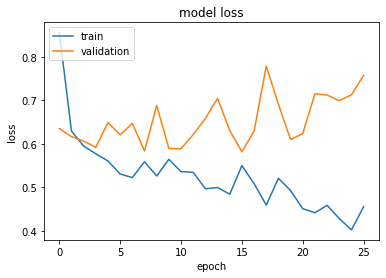

In [144]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Plot of loss in each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# Model_4 

code de self attention

In [176]:
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        
        self.supports_masking = True
        #self.init = initializations.get('glorot_uniform')
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

       # self.w = self.add_weight(name='attention_weigth',shape=(input_shape[-1],1), initializer='normal')            
       #self.b = self.add_weight(name='attention_bias',shape=(input_shape[-2],1), initializer='zero')
        
        self.W = self.add_weight(name='{}_W'.format(self.name),
                                shape= (input_shape[-1],),
                                 initializer=self.init,
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight(name='{}_b'.format(self.name),
                                      shape=(input_shape[1],),
                                     initializer='zero',
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        # eij = K.dot(x, self.W) TF backend doesn't support it

        # features_dim = self.W.shape[0]
        # step_dim = x._keras_shape[1]

        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)), K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
    #print weigthted_input.shape
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        #return input_shape[0], input_shape[-1]
        return input_shape[0],  self.features_dim

    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'vocab_size':   self.W_regularizer,
            'num_layers': self.step_dim,
            'units': self.b_regularizer,
            'd_model': self.W_constraint,
            'num_heads': self.b_constraint,
        })
        return config


In [178]:
MODEL_FILE_PATH = '/content/drive/MyDrive/ModelTest2'
MODEL_FILE_NAME = 'Mode_4.h5'

input_comment = Input(shape = (MAX_LENGTH,), dtype = 'int32')
embedding_layer = Embedding(vocab_size, 100, weights = [embedding_matrix], input_length = MAX_LENGTH, trainable = False)

embedded_sequence = embedding_layer(input_comment)
x = Bidirectional(LSTM(300, dropout = 0.25, return_sequences = True)) (embedded_sequence)

merged = Attention(MAX_LENGTH)(x)
merged = Dense(1024, activation='relu')(merged)
merged = Dropout(0.25)(merged)
merged = Dense(64, activation='relu')(merged)
merged = Dropout(0.25)(merged)
merged = Dense(32, activation='relu')(merged)
merged = Dropout(0.25)(merged)
#merged = BatchNormalization()(merged)
preds = Dense(3, activation='softmax')(merged)
model = Model(inputs=[input_comment], outputs=preds)
    
    
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

save_best = ModelCheckpoint(os.path.join(MODEL_FILE_PATH,MODEL_FILE_NAME), 
                     monitor='val_accuracy', 
                     mode='max', 
                     verbose=1, 
                     save_best_only=True) 


model.compile(loss='binary_crossentropy',
        optimizer=Adam(learning_rate=0.0001),
        metrics=['accuracy',f1_m,precision_m, recall_m])
print(model.summary())



history = model.fit(
    X_train,
    y_train, 
    batch_size = 128, 
    epochs = 100,
    validation_data = (X_test,y_test), 
    callbacks=[early_stopping, save_best]
)

Model: "model_124"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_143 (InputLayer)      [(None, 100)]             0         
                                                                 
 embedding_63 (Embedding)    (None, 100, 100)          2281400   
                                                                 
 bidirectional_68 (Bidirecti  (None, 100, 600)         962400    
 onal)                                                           
                                                                 
 attention_3 (Attention)     (None, 600)               700       
                                                                 
 dense_324 (Dense)           (None, 1024)              615424    
                                                                 
 dropout_107 (Dropout)       (None, 1024)              0         
                                                         

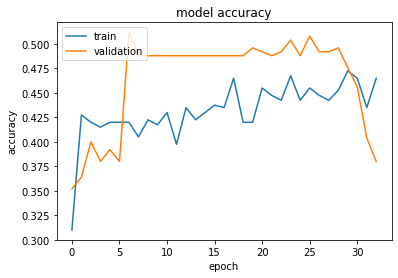

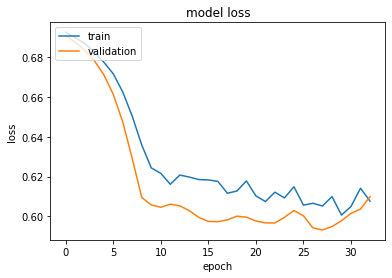

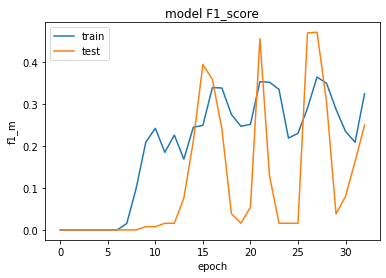

In [179]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Plot of loss in each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])

plt.title('model F1_score')
plt.ylabel('f1_m')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


In [180]:
model.evaluate(X_train,y_train,verbose=1)

13/13 [==============================] - 3s 247ms/step - loss: 0.5973 - accuracy: 0.4400 - f1_m: 0.2992 - precision_m: 0.5479 - recall_m: 0.2091


[0.5973183512687683,
 0.4399999976158142,
 0.29917579889297485,
 0.5479479432106018,
 0.20913460850715637]